In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf 

import warnings 
warnings.simplefilter('ignore')
print(f'TensorFlow Version: {tf.__version__}')

TensorFlow Version: 2.8.2


# Table of Contents 
- [Exploratory Data Analysis (EDA)](#eda)
  - [BMI (Body Mass Index) Distribution](#bmi)
  - ['smoker' and 'charges' relationship](#smoker-charges-relation)
  - ['smoker' and 'region' relationship](#smoker-region-relation)
  - ['bmi' and 'sex' relationship](#bmi-sex-relation)
  - [which 'region' has the most 'children'](#most-children)
  - ['age' and 'bmi' relationship](#age-bmi-relation)
  - ['bmi' and 'children' relationship](#bmi-children-relation)
  - ['Does 'bmi' have any outliers?](#bmi-outlier)
  - ['bmi' and 'charges' relation](#bmi-charges)
  - ['region', 'smoker', and 'bmi' relation](#smoker-region-bmi)
  - ['smoker's in which 'region' have 'charges'ed](#smoker-region-charges)
- [Feature Scaling](#feature-scaling)
- [Regression Models](#regression-models)
  - [Linear Regression](#linear)
  - [Ridge Regression](#ridge)
  - [Lasso Regression](#lasso)
  - [Support Vector Regression](#svr)
  - [Stochastic Gradient Descent](#sgd)
  - [K-Nearest Neighbors Regression](#knn)
  - [Decision Tree Regression](#tree)
  - [Random Forest Regression](#random)
  - [Model Comparison](#model-comparison)
- [Hyperparameter Tuning](#hyperparameter)
- [Additional Application (XGBRgressor)](#xgboost)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Global AI Hub/insurance.csv')

## Content

- **age:** age of primary beneficiary
- **sex:** insurance contractor gender, female, male
- **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to - weight, ideally 18.5 to 24.9
- **children:** Number of children covered by health insurance / Number of dependents
- **smoker:** Smoking
- **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **charges:** Individual medical costs billed by health insurance

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Exploratory Data Analysis (EDA) <a name="eda"></a>



### (Body Mass Index) BMI Distribution <a name="bmi"></a>

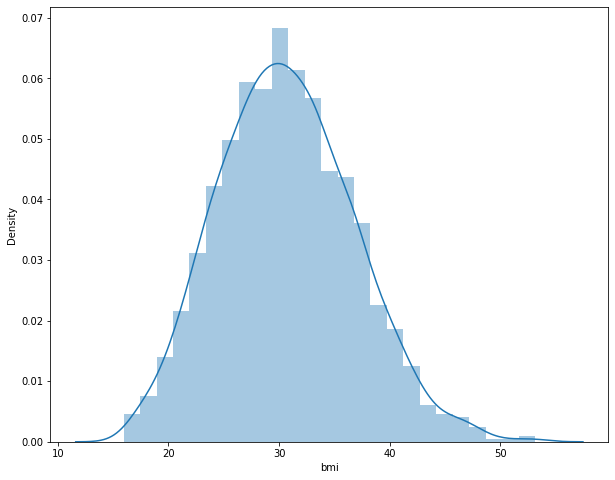

In [ ]:
# BMI Distribution
plt.figure(figsize=(10,8))
sns.distplot(data['bmi'])

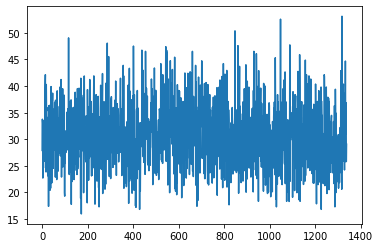

In [ ]:
# BMI Plot
plt.plot(np.arange(len(data['bmi'])), data['bmi'])

In [ ]:
np.arange(len(data['bmi']))

array([   0,    1,    2, ..., 1335, 1336, 1337])

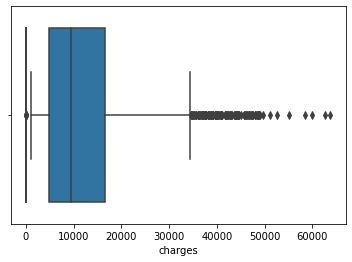

In [ ]:
sns.boxplot(data['age'])
sns.boxplot(data['bmi'])
sns.boxplot(data['children'])
sns.boxplot(data['charges'])
plt.show()

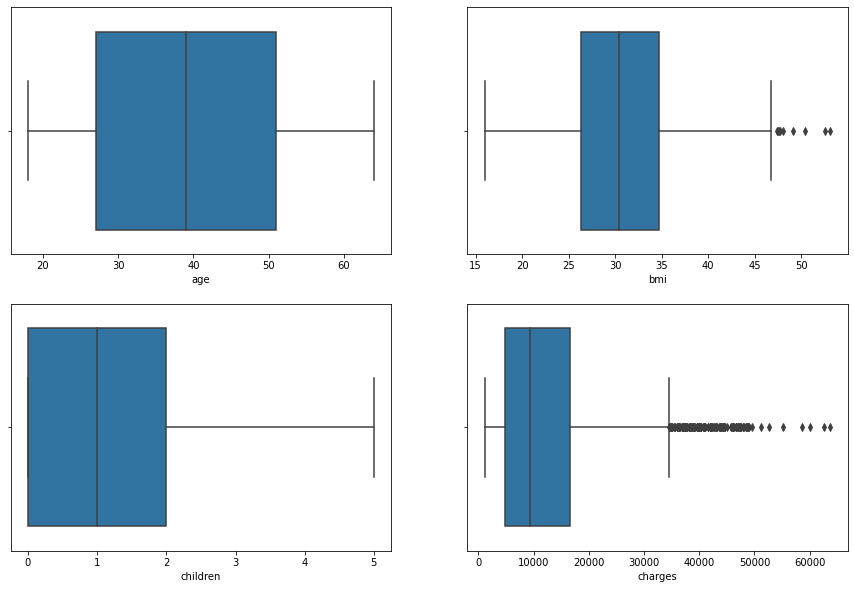

In [ ]:
plt.figure(figsize=(15,10))
for count, label in enumerate(data[['age', 'bmi', 'children','charges']]):
    plt.subplot(2, 2, count + 1)
    sns.boxplot(data[label])
plt.show()

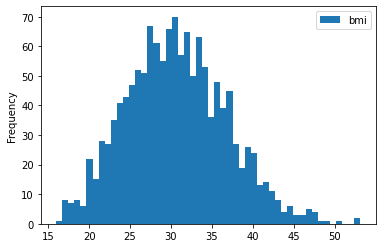

In [ ]:
data.plot(kind='hist', y='bmi', bins=50)

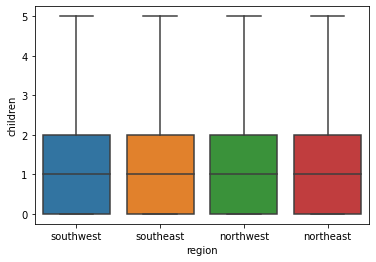

In [ ]:
sns.boxplot(x = 'region', y = 'children', data = data)

### 'smoker' and 'charges' relationship <a name='smoker-charges-relation'></a> 

In [ ]:
# relation between 'smoker' and 'charges'
data[['smoker', 'charges']].value_counts()

smoker  charges    
no      1639.56310     2
        12741.16745    1
        12950.07120    1
        12949.15540    1
        12928.79110    1
                      ..
        6272.47720     1
        6250.43500     1
        6238.29800     1
        6203.90175     1
yes     63770.42801    1
Length: 1337, dtype: int64

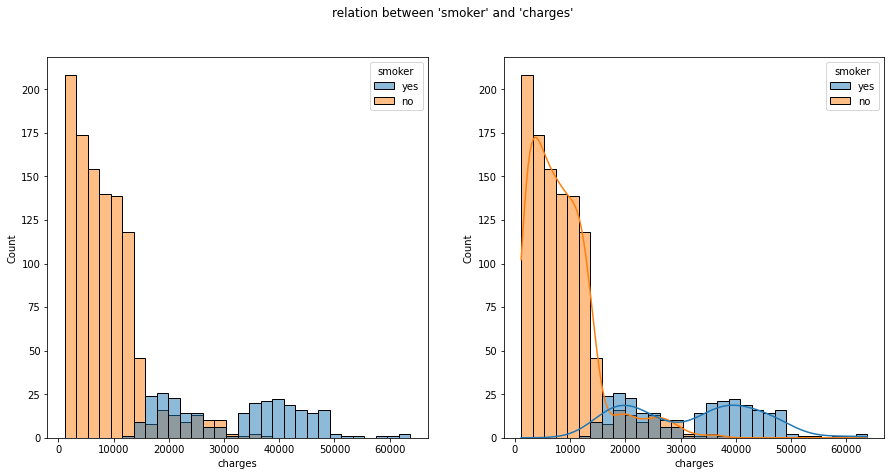

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,7))
fig.suptitle("relation between 'smoker' and 'charges'")
sns.histplot(data=data, x='charges', hue='smoker', ax=axes[0])
sns.histplot(data=data, x='charges', hue='smoker', kde='kde', ax=axes[1])

## 'smoker' and 'region' relationship <a name='smoker-region-relation'></a>

In [ ]:
rsc = pd.DataFrame({
    'region': [
        np.unique(data.region)[0],
        np.unique(data.region)[1],
        np.unique(data.region)[2],
        np.unique(data.region)[3],
        ] 
, 'no': [
    data[(data['region'] == 'northeast') & (data['smoker'] == 'no')].smoker.value_counts()[0],
    data[(data['region'] == 'northwest') & (data['smoker'] == 'no')].smoker.value_counts()[0],
    data[(data['region'] == 'southeast') & (data['smoker'] == 'no')].smoker.value_counts()[0],
    data[(data['region'] == 'southwest') & (data['smoker'] == 'no')].smoker.value_counts()[0],
], 'yes': [
    data[(data['region'] == 'northeast') & (data['smoker'] == 'yes')].smoker.value_counts()[0],
    data[(data['region'] == 'northwest') & (data['smoker'] == 'yes')].smoker.value_counts()[0],
    data[(data['region'] == 'southeast') & (data['smoker'] == 'yes')].smoker.value_counts()[0],
    data[(data['region'] == 'southwest') & (data['smoker'] == 'yes')].smoker.value_counts()[0],
]})
rsc.melt(id_vars='region')

,region,variable,value
0,northeast,no,257
1,northwest,no,267
2,southeast,no,273
3,southwest,no,267
4,northeast,yes,67
5,northwest,yes,58
6,southeast,yes,91
7,southwest,yes,58


In [ ]:
rsc

,region,no,yes
0,northeast,257,67
1,northwest,267,58
2,southeast,273,91
3,southwest,267,58


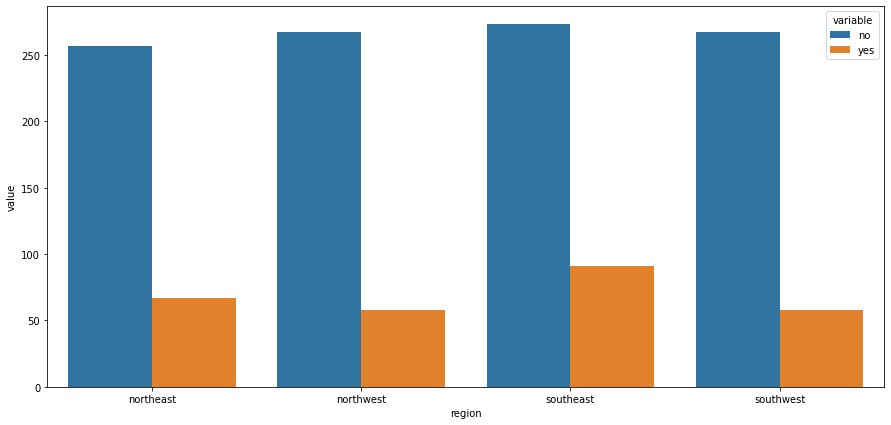

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'region', y = 'value', data = rsc.melt(id_vars='region'), hue='variable')

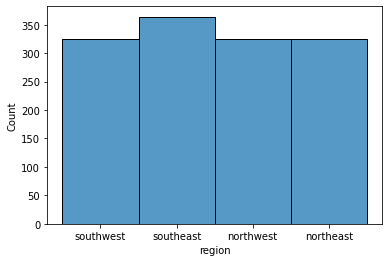

In [ ]:
sns.histplot(data.region)

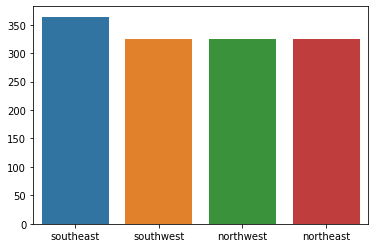

In [ ]:
sns.barplot(x = data.region.value_counts().T.index,  y = data.region.value_counts().T.values)

### BMI and Sex Relationship <a name='bmi-sex-relation'></a> 

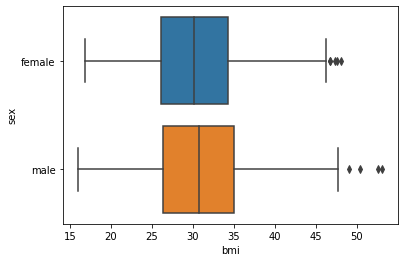

In [ ]:
sns.boxplot(data=data, x = 'bmi', y = 'sex')

### Which region has the most children? <a name='most-children'></a>

In [ ]:
# which 'region' has the most 'children'
regions = []
children = []
for reg in np.unique(data.region):
    regions.append(reg)
    children.append(data[data.region == reg].children.sum())
most_child = pd.DataFrame({'region': regions, 'children': children}).sort_values(by='children')

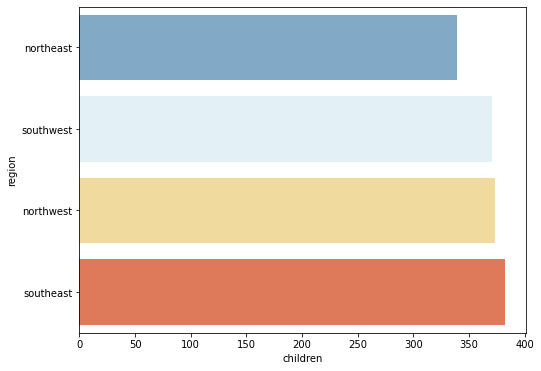

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(y = most_child.region, x = most_child.children, orient='h', palette='RdYlBu_r')
plt.show()

### Age and BMI relationship <a name='age-bmi-relation'></a>

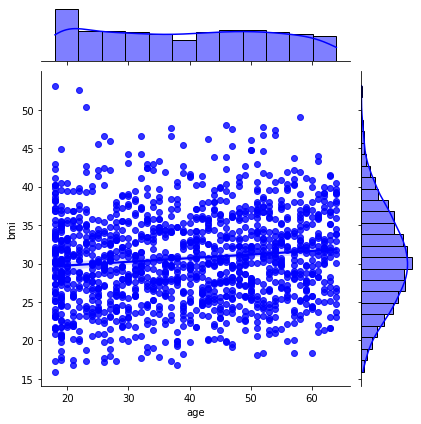

In [ ]:
# 'age' and 'bmi'
sns.jointplot(data.age, data.bmi, kind='reg', color='blue', truncate=True)

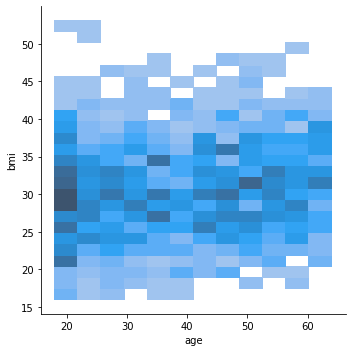

In [ ]:
sns.displot(data=data, x="age", y="bmi")

In [ ]:
age_bmi_df = {'age': [], 'bmi': []}
for age in np.unique(data.age):
    age_bmi_df['age'].append(age)
    age_bmi_df['bmi'].append(np.mean(data[data['age'] == age].bmi))
age_bmi_df = pd.DataFrame(age_bmi_df)
age_bmi_df.head()

,age,bmi
0,18,31.326159
1,19,28.596912
2,20,30.632759
3,21,28.185714
4,22,31.087679


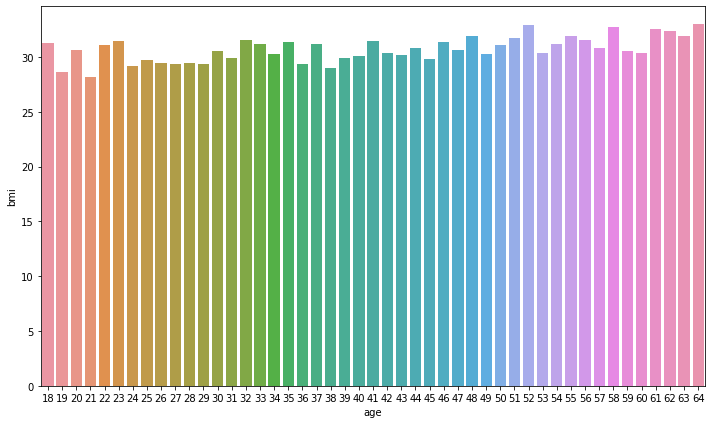

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x = age_bmi_df.age, y = age_bmi_df.bmi)
plt.tight_layout()

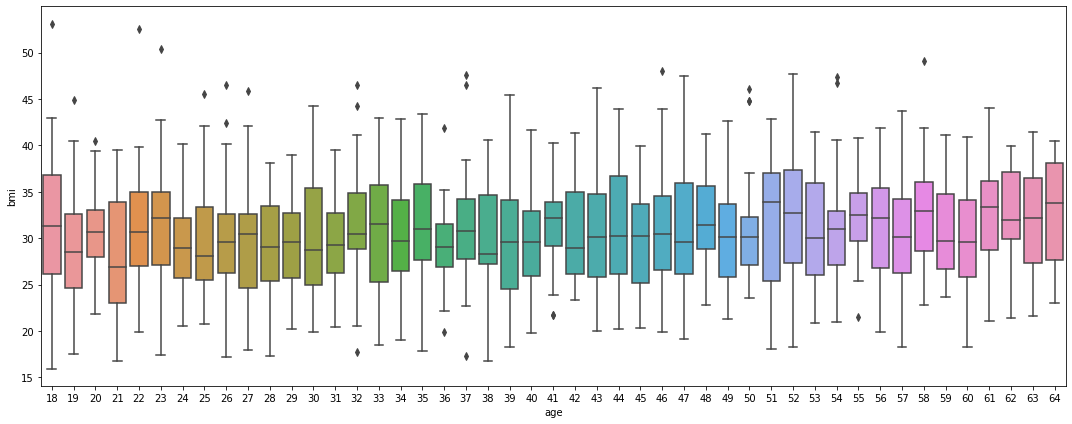

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x = data.age, y = data.bmi)
plt.tight_layout()

### BMI and Children Relationship <a name='bmi-children-relation'></a>

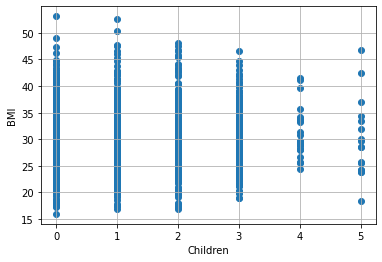

In [ ]:
plt.scatter(x = data.children, y = data.bmi)
plt.xlabel('Children')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

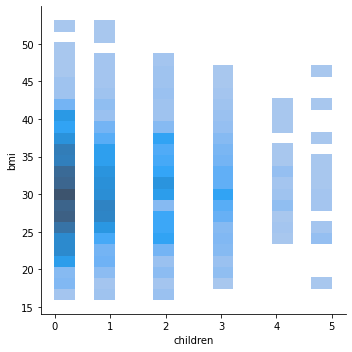

In [ ]:
sns.displot(data=data, x="children", y="bmi")

### Does BMI have any outliers? <a name='bmi-outlier'></a>

In [ ]:
Q3 = np.quantile(data.bmi, 0.75)
Q1 = np.quantile(data.bmi, 0.25)
Q4 = Q3 + (1.5 * (Q3 - Q1))
Q0 = Q1 - (1.5 * (Q3 - Q1))

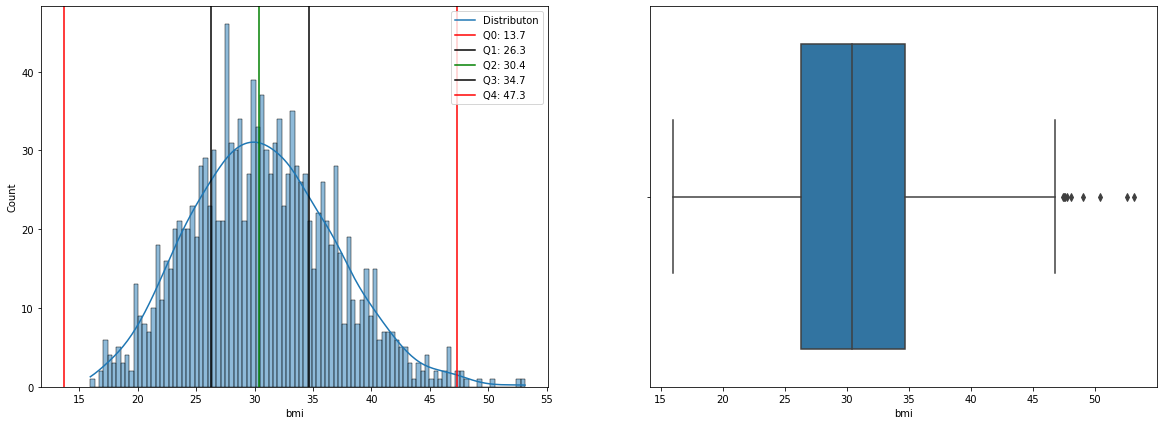

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(121)
sns.histplot(data.bmi, kde=True, bins=100)
plt.axvline(Q0, c='red')
plt.axvline(Q1, c='black')
plt.axvline(data.bmi.median(), c='green')
plt.axvline(Q3, c='black')
plt.axvline(Q4, c='red')
plt.legend(['Distributon', f'Q0: {Q0:.1f}', f'Q1: {Q1:.1f}', f'Q2: {data.bmi.median():.1f}', f'Q3: {Q3:.1f}', f'Q4: {Q4:.1f}'], loc='best')
plt.subplot(122)
sns.boxplot(data.bmi)
# sns.kdeplot(data.bmi)

### BMI Charges <a name='bmi-charges'></a>

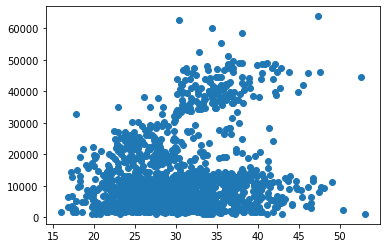

In [ ]:
plt.scatter(data.bmi, data.charges)

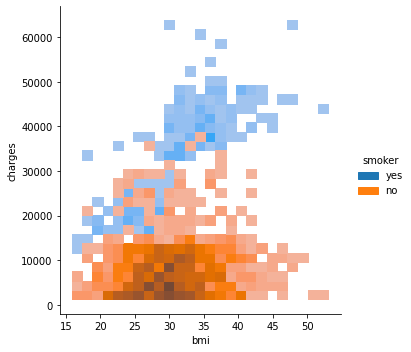

In [ ]:
sns.displot(x=data.bmi, y=data.charges, hue=data.smoker)

## 'smoker', 'region' and 'bmi' <a name='smoker-region-bmi'></a>

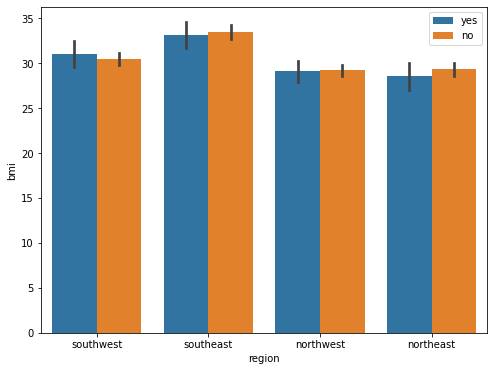

In [ ]:
# 'region', 'smoker', and 'bmi' relation
plt.figure(figsize=(8,6))
sns.barplot(x = data.region, y = data.bmi, hue = data.smoker)
plt.legend(loc='upper')

## 'smoker's in which 'region' have 'charges'ed <a name='smoker-region-charges'></a>

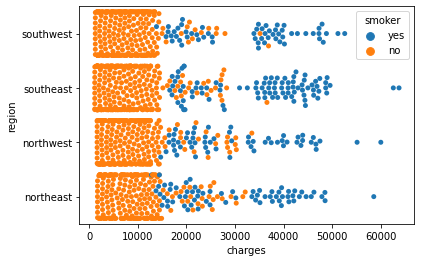

In [ ]:
# 'smoker's in which 'region' have 'charges'ed
sns.swarmplot(data=data, x = 'charges', y = 'region', hue = 'smoker')

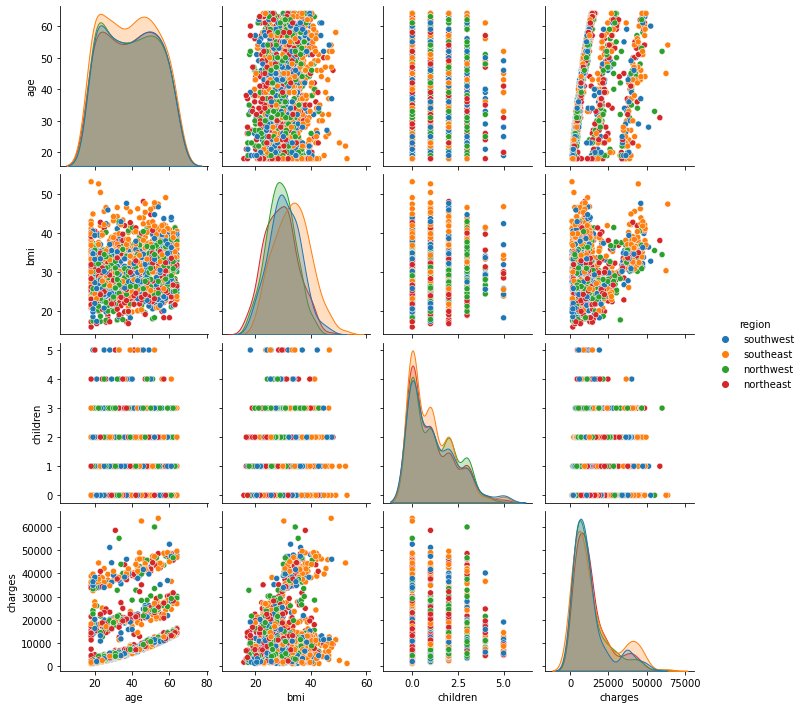

In [ ]:
sns.pairplot(data.drop(['sex', 'smoker'], axis=1), hue='region')

# Feature Scaling <a name='feature-scaling'></a>

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# One Hot Encoding the 'region' it has four different category
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(data['region'].values.reshape(-1,1))
data_dum = encoder.transform(data['region'].values.reshape(-1,1)).toarray()
# Label Encoding the 'sex'
label = LabelEncoder()
data.sex = label.fit_transform(data.sex.values.reshape(-1,1))
# Label Encoding the 'smoker'
label1 = LabelEncoder()
data.smoker = label1.fit_transform(data.smoker.values.reshape(-1,1))
data = pd.concat([data.iloc[:, :5],  pd.DataFrame(data=data_dum, columns=encoder.get_feature_names_out(['region'])), data[['charges']]], axis=1)

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,27.900,0,1,0.0,0.0,0.0,1.0,16884.92400
1,18,1,33.770,1,0,0.0,0.0,1.0,0.0,1725.55230
2,28,1,33.000,3,0,0.0,0.0,1.0,0.0,4449.46200
3,33,1,22.705,0,0,0.0,1.0,0.0,0.0,21984.47061
4,32,1,28.880,0,0,0.0,1.0,0.0,0.0,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(data.drop(['charges'], axis=1), data.charges.values, test_size = 0.2, random_state = 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 9)
(268, 9)
(1070,)
(268,)


In [ ]:
# Normalization between -1 and 1 
from sklearn.preprocessing import StandardScaler
stand_scaler = StandardScaler()
stand_scaler.fit(x_train)
x_train = stand_scaler.transform(x_train)
x_test = stand_scaler.transform(x_test)

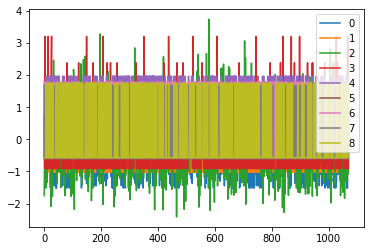

In [ ]:
pd.DataFrame(x_train).plot()

# Regression Models <a name='regression-models'></a>

## Linear Regression <a name='linear'></a>

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [ ]:
linear.score(x_test, y_test)

0.7810553881326064

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(linear, x_test, y_test, cv=3))
print(cross_val_score(linear, x_test, y_test, cv=3).mean())

[0.80024935 0.77028067 0.71436007]
0.761630031850611


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error
mse(y_test, linear.predict(x_test), squared=False)

5830.16923076608

## Ridge Regression <a name='ridge'></a>

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
ridge.score(x_test, y_test)

0.783543715608132

## Lasso Regression <a name='lasso'></a>

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)

Lasso()

In [ ]:
lasso.score(x_test, y_test)

0.7835697328829222

## Support Vector Regression (SVR) <a name='svr'></a>

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [ ]:
svr.score(x_test, y_test)

0.01926334007972086

In [ ]:
mse(y_test, svr.predict(x_test))

152258122.3801022

## Stochastic Gradient Descent (SGD) <a name='sgd'></a>

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()
sgd_reg.fit(x_train, y_train)

SGDRegressor()

In [ ]:
sgd_reg.score(x_test, y_test)

0.7843964348297876

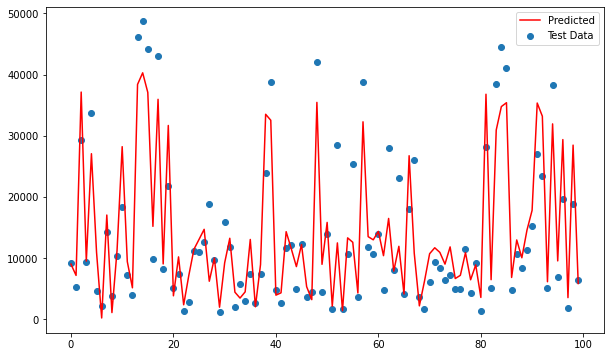

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(np.arange(len(y_test[:100])), y_test[:100], label='Test Data')
plt.plot(np.arange(len(y_test[:100])), sgd_reg.predict(x_test[:100]), c='red', label='Predicted')
plt.legend()

In [ ]:
mse(y_test, sgd_reg.predict(x_test), squared=False)

5785.51467008592

In [ ]:
from sklearn.linear_model import BayesianRidge
bayes = BayesianRidge()
bayes.fit(x_train, y_train)

BayesianRidge()

In [ ]:
bayes.score(x_test, y_test)

0.7834536816242698

## K-Nearest Neighbors (KNN) <a name='knn'></a>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
knn.score(x_test, y_test)

0.8037995832203448

Max Score Index 3 and Max Score 0.8128278387967436


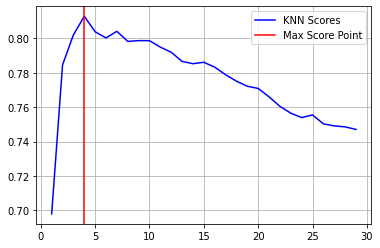

In [ ]:
scores = []
for i in range(1, 30):
    knn_test = KNeighborsRegressor(n_neighbors=i)
    knn_test.fit(x_train, y_train)
    scores.append(knn_test.score(x_test, y_test))

print(f'Max Score Index {scores.index(np.max(scores))} and Max Score {np.max(scores)}')
plt.plot(np.arange(1,30), scores, c='blue', label='KNN Scores')
plt.axvline(scores.index(np.max(scores))+1, c='red', label='Max Score Point')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Decision Tree Regression <a name='tree'></a>

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
tree.score(x_test, y_test)

0.7582588086922268

## Random Forest Regression <a name='random'></a>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ensemble = RandomForestRegressor()
ensemble.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
ensemble.score(x_test, y_test)

0.863146104096379

# Model Comparison <a name='model-comparison'></a>

In [ ]:
models = [linear, ridge, lasso, sgd_reg, knn, tree, ensemble]
model_names = ['Linear Regression', 'Ridge', 'Lasso', 'SGD Regression', 'KNN', 'Decision Tree', 'Random Forest']
df_score = {'model': [], 'acc_score': [], 'mse': []}
for name, model in zip(model_names, models):
    df_score['acc_score'].append(model.score(x_test, y_test))
    df_score['model'].append(name)
    df_score['mse'].append(round(mse(y_test, model.predict(x_test), squared=False), 2))
df_score = pd.DataFrame(df_score).sort_values(by='acc_score')
df_score

,model,acc_score,mse
5,Decision Tree,0.758259,6126.17
0,Linear Regression,0.781055,5830.17
1,Ridge,0.783544,5796.94
2,Lasso,0.783570,5796.60
3,SGD Regression,0.784396,5785.51
4,KNN,0.803800,5519.05
6,Random Forest,0.863146,4609.38


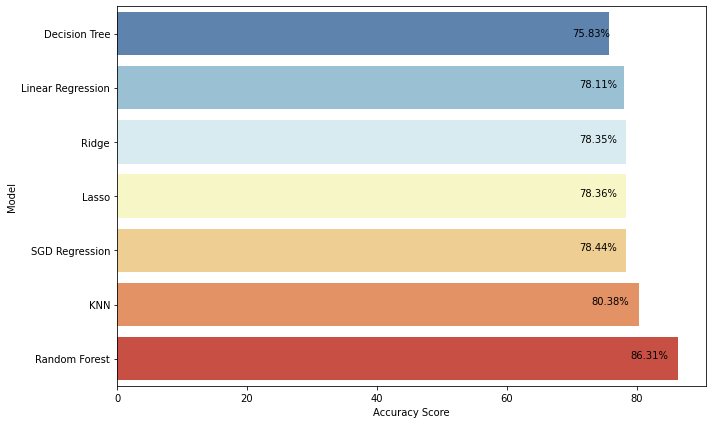

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x = df_score.acc_score*100, y = df_score.model, palette='RdYlBu_r')
plt.text(70.1, 0.05, f"{df_score.acc_score.values[0] * 100:.2f}%")
plt.text(71.1, 1, f"{df_score.acc_score.values[1] * 100:.2f}%")
plt.text(71.1, 2, f"{df_score.acc_score.values[2] * 100:.2f}%")
plt.text(71.1, 3, f"{df_score.acc_score.values[3] * 100:.2f}%")
plt.text(71.1, 4, f"{df_score.acc_score.values[4] * 100:.2f}%")
plt.text(73.1, 5, f"{df_score.acc_score.values[5] * 100:.2f}%")
plt.text(79.1, 6, f"{df_score.acc_score.values[6] * 100:.2f}%")
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

# Hyperparameter Tuning (GridSearchCV) <a name='hyperparameter'></a>

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

random = RandomForestRegressor()
grid_search = GridSearchCV(estimator=random, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
# Save the Hyper-tuning Score
np.save("/content/drive/My Drive/Global AI Hub/Hyperparameter Tuning of Random Forest.npy", grid_search.cv_results_)
# Load the Grid Search
#history = np.load('/content/drive/My Drive/Global AI Hub/Hyperparameter Tuning of Random Forest.npy', allow_pickle=True).item()

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.146542,0.005779,0.010667,0.000491,True,80,2,3,8,100,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.800545,0.856932,0.786879,0.756125,0.795649,0.799226,0.032725,145
1,0.300705,0.009875,0.019658,0.000556,True,80,2,3,8,200,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.797865,0.850578,0.779150,0.754129,0.786422,0.793629,0.031884,154
2,0.430522,0.007352,0.030742,0.003956,True,80,2,3,8,300,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.799267,0.858237,0.778007,0.740586,0.789380,0.793096,0.038158,157
3,1.411771,0.017024,0.097978,0.005153,True,80,2,3,8,1000,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.805327,0.855589,0.782363,0.743870,0.791368,0.795704,0.036228,151
4,0.145173,0.005619,0.010584,0.001092,True,80,2,3,10,100,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.802051,0.854944,0.776325,0.731979,0.796058,0.792272,0.039818,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,1.564019,0.019515,0.133298,0.069015,True,110,3,5,10,1000,"{'bootstrap': True, 'max_depth': 110, 'max_fea...",0.825532,0.889233,0.807627,0.774368,0.825918,0.824536,0.037394,110
284,0.162715,0.005717,0.010988,0.000403,True,110,3,5,12,100,"{'bootstrap': True, 'max_depth': 110, 'max_fea...",0.823731,0.892808,0.810415,0.770361,0.816788,0.822820,0.039601,134
285,0.322667,0.014061,0.021703,0.001245,True,110,3,5,12,200,"{'bootstrap': True, 'max_depth': 110, 'max_fea...",0.819166,0.885566,0.806647,0.768455,0.828023,0.821571,0.037913,138
286,0.481228,0.012864,0.030750,0.001652,True,110,3,5,12,300,"{'bootstrap': True, 'max_depth': 110, 'max_fea...",0.820217,0.888792,0.806996,0.777522,0.827494,0.824204,0.036534,117


In [ ]:
grid_search.best_score_

0.8339383855971665

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
ensemble.get_params() 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
history = np.load('/content/drive/My Drive/Global AI Hub/Hyperparameter Tuning of Random Forest.npy', allow_pickle=True).item()

In [ ]:
pd.DataFrame(history)[pd.DataFrame(history)['mean_test_score'] == pd.DataFrame(history)['mean_test_score'].max()].params.values[0]

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

## Additional Application (XGBRegressor) <a name='xgboost'></a>

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

# define model
xgboost = XGBRegressor()
# define model evaluation method
xgboost.fit(x_train, y_train)

[11:50:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
xgboost.score(x_test, y_test)

0.8795683601941877

In [ ]:
from numpy import absolute
xgboost_model = XGBRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(xgboost_model, x_train, y_train, cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 0.848 (0.043)


In [ ]:
scores

array([0.79224767, 0.82553561, 0.86853697, 0.8163939 , 0.85959844,
       0.92810409, 0.86344387, 0.89208241, 0.82941925, 0.82240527,
       0.87575735, 0.82771253, 0.81422275, 0.82034982, 0.85901404,
       0.8880205 , 0.77879655, 0.88578691, 0.92173775, 0.83972482,
       0.88249107, 0.74938567, 0.8272406 , 0.88285022, 0.86299184,
       0.77026869, 0.90952573, 0.85062694, 0.86585343, 0.8359803 ])

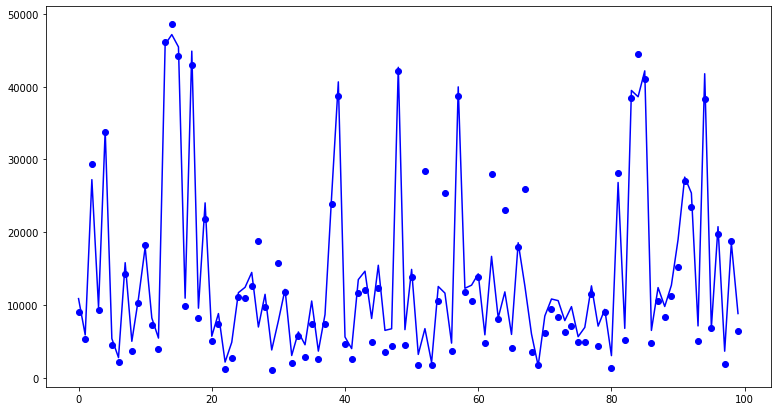

In [ ]:
plt.figure(figsize=(13,7))
plt.plot(y_test[:100], 'bo')
plt.plot(xgboost.predict(x_test[:100, :]), 'b')